In [1]:
import polars as pl 

In [2]:
join_cols = ["vocab_size", "vocab_construct", "vocab_init", "pre-tok", "segment"]
exclusions = ["Avg", "xcopa", "chars_total"]

### Read Tokenizer Metrics

In [3]:
#tok_metrics = pl.read_csv("raw_metrics/timtc_tok_metrics_250828.csv")
tok_metrics = pl.read_csv("raw_metrics/timtc_tok_metrics_250829.csv")

In [4]:
tok_metrics

vocab_size,vocab_construct,vocab_init,pre-tok,segment,fertility,renyi_efficiency_a_1,renyi_efficiency_a_2,renyi_efficiency_a_2_5,unigram_entropy,compression_ratio_global_mean,bigrams_entropy,average_token_rank,corr_chunkability_rt_mean,corr_chunkability_rt_z,corr_chunkability_accuracy,encoding_length,chars_total,avg_chars_per_token,u_stats_n_tokens,u_mean,u_median,final_tokens_count,used_in_merges,no_leading_space_tokens_count,no_leading_space_tokens_share,AUC_zipf,SLOPE_zipf,POWER_LAW_MAE_zipf,macro_precision_morphscore,macro_recall_morphscore
i64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,i64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64
32768,"""bpe""",null,"""firstspace""","""greedy""",0.225596,11.020897,7.315196,6.665019,11.020897,0.021181,17.649035,2445.692232,-0.18401,-0.192717,0.160381,67190367,297280223,4.424447,12155,4.055277,4.001188,14777,17818,14053,0.43114,108.014657,-1.609179,0.696343,0.36315,0.394606
40960,"""bpe""",null,"""firstspace""","""greedy""",0.221558,11.062651,7.273099,6.625877,11.062651,0.021572,17.670606,2736.765038,-0.21343,-0.225918,0.17864,65969529,297280223,4.506326,14999,3.911877,3.830622,18581,22151,17547,0.430792,108.743827,-1.62734,0.667455,0.396561,0.423536
49152,"""bpe""",null,"""firstspace""","""greedy""",0.218667,11.091536,7.242826,6.598073,11.091536,0.021869,17.680852,2990.671042,-0.247345,-0.257868,0.198202,65086179,297280223,4.567486,17821,3.779973,3.697596,22286,26573,21073,0.431302,109.292223,-1.641389,0.648108,0.424752,0.448773
32768,"""bpe""",null,"""firstspace""","""merge""",0.225929,11.001949,7.33891,6.679353,11.001949,0.021173,17.661657,2317.79723,-0.374315,-0.392308,0.344548,67327610,297280223,4.415428,28113,3.476669,3.359387,14576,18192,14151,0.431854,108.042478,-1.619426,0.642777,0.15812,0.177064
40960,"""bpe""",null,"""firstspace""","""merge""",0.221775,11.044597,7.29009,6.635917,11.044597,0.021562,17.68123,2602.005568,-0.356411,-0.37842,0.35865,66074132,297280223,4.499192,34188,3.352724,3.233178,18340,22620,17672,0.431445,108.752816,-1.641396,0.620475,0.161251,0.176638
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
40960,"""unigram""",null,"""firstspace""","""pathpiecel""",0.257703,9.91825,5.713107,5.014875,9.91825,0.018672,16.362595,1843.964368,-0.215551,-0.235622,0.242253,77087128,297280223,3.856418,24264,2.819164,2.586765,26278,14682,30604,0.747168,109.562158,-1.753483,0.642477,0.469178,0.500334
49152,"""unigram""",null,"""firstspace""","""pathpiecel""",0.255691,9.963943,5.718645,5.020112,9.963943,0.018819,16.391442,1978.523943,-0.213288,-0.232138,0.242852,76468257,297280223,3.887629,28749,2.687364,2.458333,30995,18157,37110,0.755005,110.072939,-1.799061,0.637672,0.461965,0.488062
32768,"""wordpiece""",null,"""firstspace""","""greedy""",0.227154,11.024954,7.347186,6.691749,11.024954,0.021049,17.636253,2377.684612,-0.369593,-0.388476,0.339634,67696606,297280223,4.391361,28157,3.60529,3.471333,18130,14638,14864,0.453613,107.991597,-1.675933,0.744307,0.126312,0.126984


In [5]:
tok_cols = [c for c in tok_metrics.columns if (c not in join_cols) and (c not in exclusions)]

In [6]:
tok_cols

['fertility',
 'renyi_efficiency_a_1',
 'renyi_efficiency_a_2',
 'renyi_efficiency_a_2_5',
 'unigram_entropy',
 'compression_ratio_global_mean',
 'bigrams_entropy',
 'average_token_rank',
 'corr_chunkability_rt_mean',
 'corr_chunkability_rt_z',
 'corr_chunkability_accuracy',
 'encoding_length',
 'avg_chars_per_token',
 'u_stats_n_tokens',
 'u_mean',
 'u_median',
 'final_tokens_count',
 'used_in_merges',
 'no_leading_space_tokens_count',
 'no_leading_space_tokens_share',
 'AUC_zipf',
 'SLOPE_zipf',
 'POWER_LAW_MAE_zipf',
 'macro_precision_morphscore',
 'macro_recall_morphscore']

### Read Model Metrics

In [7]:
mod_metrics = pl.read_csv("raw_metrics/timtc_mod_metrics_250828.csv")

In [8]:
mod_metrics

vocab_size,vocab_construct,vocab_init,pre-tok,segment,Avg,arc_easy,copa,mktg,mathqa,piqa,qa4mre,race,sciq,sociology,wsc273
i64,str,str,str,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64
32768,"""bpe""",null,"""firstspace""","""merge""",48.8,51.2,69,32.9,23.9,66.3,29.6,29.2,87.3,30.9,67.8
32768,"""bpe""",null,"""firstspace""","""greedy""",48.3,51.9,66,32.9,23.7,65.6,27.5,30.7,88.0,30.9,66.3
32768,"""bpe""",null,"""firstspace""","""pathpiecel""",45.6,45.6,61,29.9,23.0,60.5,28.2,29.0,83.8,28.4,66.3
40960,"""bpe""",null,"""firstspace""","""merge""",50.0,52.7,70,31.6,24.3,66.9,32.4,30.1,87.7,35.3,69.2
40960,"""bpe""",null,"""firstspace""","""greedy""",49.1,52.3,66,27.4,22.9,66.9,31.7,30.9,88.3,35.8,68.9
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
49152,"""unigram""",null,"""firstspace""","""greedy""",48.6,51.6,68,32.1,24.4,65.7,32.4,29.5,86.7,32.3,63.7
49152,"""unigram""",null,"""firstspace""","""pathpiecel""",44.0,39.4,57,30.3,23.3,61.2,33.1,26.0,74.5,27.9,67.0
32768,"""wordpiece""",null,"""firstspace""","""greedy""",48.5,52.5,64,32.5,23.9,65.6,32.0,30.7,88.5,27.9,67.4


In [9]:
mod_cols = [c for c in mod_metrics.columns if (c not in join_cols) and (c not in exclusions)]

In [10]:
mod_cols

['arc_easy',
 'copa',
 'mktg',
 'mathqa',
 'piqa',
 'qa4mre',
 'race',
 'sciq',
 'sociology',
 'wsc273']

### Read Additional Model Metrics

In [11]:
mod_ex_metrics = pl.read_csv("raw_metrics/timtc_mod_metrics_ex_250829.csv")

In [12]:
mod_ex_cols = [c for c in mod_ex_metrics.columns if (c not in join_cols) and (c not in exclusions)]

In [13]:
mod_ex_cols

['blimp', 'squad_v2', 'hellaswag', 'winogrande', 'math-1digit', 'math-2digit']

### Merged

In [14]:
joined_metrics = tok_metrics.join(
    mod_metrics,
    how='left', 
    on=join_cols,
    nulls_equal=True,
).join(
    mod_ex_metrics,
    how='left', 
    on=join_cols,
    nulls_equal=True,
)

In [15]:
joined_metrics

vocab_size,vocab_construct,vocab_init,pre-tok,segment,fertility,renyi_efficiency_a_1,renyi_efficiency_a_2,renyi_efficiency_a_2_5,unigram_entropy,compression_ratio_global_mean,bigrams_entropy,average_token_rank,corr_chunkability_rt_mean,corr_chunkability_rt_z,corr_chunkability_accuracy,encoding_length,chars_total,avg_chars_per_token,u_stats_n_tokens,u_mean,u_median,final_tokens_count,used_in_merges,no_leading_space_tokens_count,no_leading_space_tokens_share,AUC_zipf,SLOPE_zipf,POWER_LAW_MAE_zipf,macro_precision_morphscore,macro_recall_morphscore,Avg,arc_easy,copa,mktg,mathqa,piqa,qa4mre,race,sciq,sociology,wsc273,blimp,xcopa,squad_v2,hellaswag,winogrande,math-1digit,math-2digit
i64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,i64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
32768,"""bpe""",null,"""firstspace""","""greedy""",0.225596,11.020897,7.315196,6.665019,11.020897,0.021181,17.649035,2445.692232,-0.18401,-0.192717,0.160381,67190367,297280223,4.424447,12155,4.055277,4.001188,14777,17818,14053,0.43114,108.014657,-1.609179,0.696343,0.36315,0.394606,48.3,51.9,66,32.9,23.7,65.6,27.5,30.7,88.0,30.9,66.3,0.5377,0.51055,0.12663,0.25612,0.50829,0.12222,0.00937
40960,"""bpe""",null,"""firstspace""","""greedy""",0.221558,11.062651,7.273099,6.625877,11.062651,0.021572,17.670606,2736.765038,-0.21343,-0.225918,0.17864,65969529,297280223,4.506326,14999,3.911877,3.830622,18581,22151,17547,0.430792,108.743827,-1.62734,0.667455,0.396561,0.423536,49.1,52.3,66,27.4,22.9,66.9,31.7,30.9,88.3,35.8,68.9,0.53513,0.51582,0.12568,0.25722,0.48382,0.04889,0.00473
49152,"""bpe""",null,"""firstspace""","""greedy""",0.218667,11.091536,7.242826,6.598073,11.091536,0.021869,17.680852,2990.671042,-0.247345,-0.257868,0.198202,65086179,297280223,4.567486,17821,3.779973,3.697596,22286,26573,21073,0.431302,109.292223,-1.641389,0.648108,0.424752,0.448773,49.5,53.9,72,31.6,24.2,68.4,29.6,31.2,88.4,29.4,66.3,0.53627,0.51491,0.126,0.25573,0.50908,0.08667,0.00746
32768,"""bpe""",null,"""firstspace""","""merge""",0.225929,11.001949,7.33891,6.679353,11.001949,0.021173,17.661657,2317.79723,-0.374315,-0.392308,0.344548,67327610,297280223,4.415428,28113,3.476669,3.359387,14576,18192,14151,0.431854,108.042478,-1.619426,0.642777,0.15812,0.177064,48.8,51.2,69,32.9,23.9,66.3,29.6,29.2,87.3,30.9,67.8,0.54681,0.51309,0.12518,0.25812,0.51776,0.05667,0.00413
40960,"""bpe""",null,"""firstspace""","""merge""",0.221775,11.044597,7.29009,6.635917,11.044597,0.021562,17.68123,2602.005568,-0.356411,-0.37842,0.35865,66074132,297280223,4.499192,34188,3.352724,3.233178,18340,22620,17672,0.431445,108.752816,-1.641396,0.620475,0.161251,0.176638,50.0,52.7,70,31.6,24.3,66.9,32.4,30.1,87.7,35.3,69.2,0.54294,0.51673,0.12518,0.26031,0.49329,0.08333,0.00886
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
40960,"""unigram""",null,"""firstspace""","""pathpiecel""",0.257703,9.91825,5.713107,5.014875,9.91825,0.018672,16.362595,1843.964368,-0.215551,-0.235622,0.242253,77087128,297280223,3.856418,24264,2.819164,2.586765,26278,14682,30604,0.747168,109.562158,-1.753483,0.642477,0.469178,0.500334,43.1,40.5,56,28.6,23.0,60.3,30.3,27.4,75.0,27.4,62.3,null,null,null,null,null,0.05222,0.00364
49152,"""unigram""",null,"""firstspace""","""pathpiecel""",0.255691,9.963943,5.718645,5.020112,9.963943,0.018819,16.391442,1978.523943,-0.213288,-0.232138,0.242852,76468257,297280223,3.887629,28749,2.687364,2.458333,30995,18157,37110,0.755005,110.072939,-1.799061,0.637672,0.461965,0.488062,44.0,39.4,57,30.3,23.3,61.2,33.1,26.0,74.5,27.9,67.0,null,null,null,null,null,0.06111,0.00565
32768,"""wordpiece""",null,"""firstspace""","""greedy""",0.227154,11.024954,7.347186,6.691749,11.024954,0.021049,17.636253,2377.684612,-0.369593,-0.388476,0.339634,67696606,297280223,4.391361,28157,3.60529,3.471333,18130,14638,14864,0.453613,107.991597,-1.675933,0.744307,0.126312,0.126984,48.5,52.5,

In [16]:
for_corr = (
    joined_metrics
    .select(
        pl.exclude(join_cols + exclusions),
    )
    .to_pandas()
)

In [17]:
for_corr.to_parquet("tmtc_data_for_corr.parquet")

In [18]:
corr_matrix = for_corr.corr(numeric_only=True)

## Plotting

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

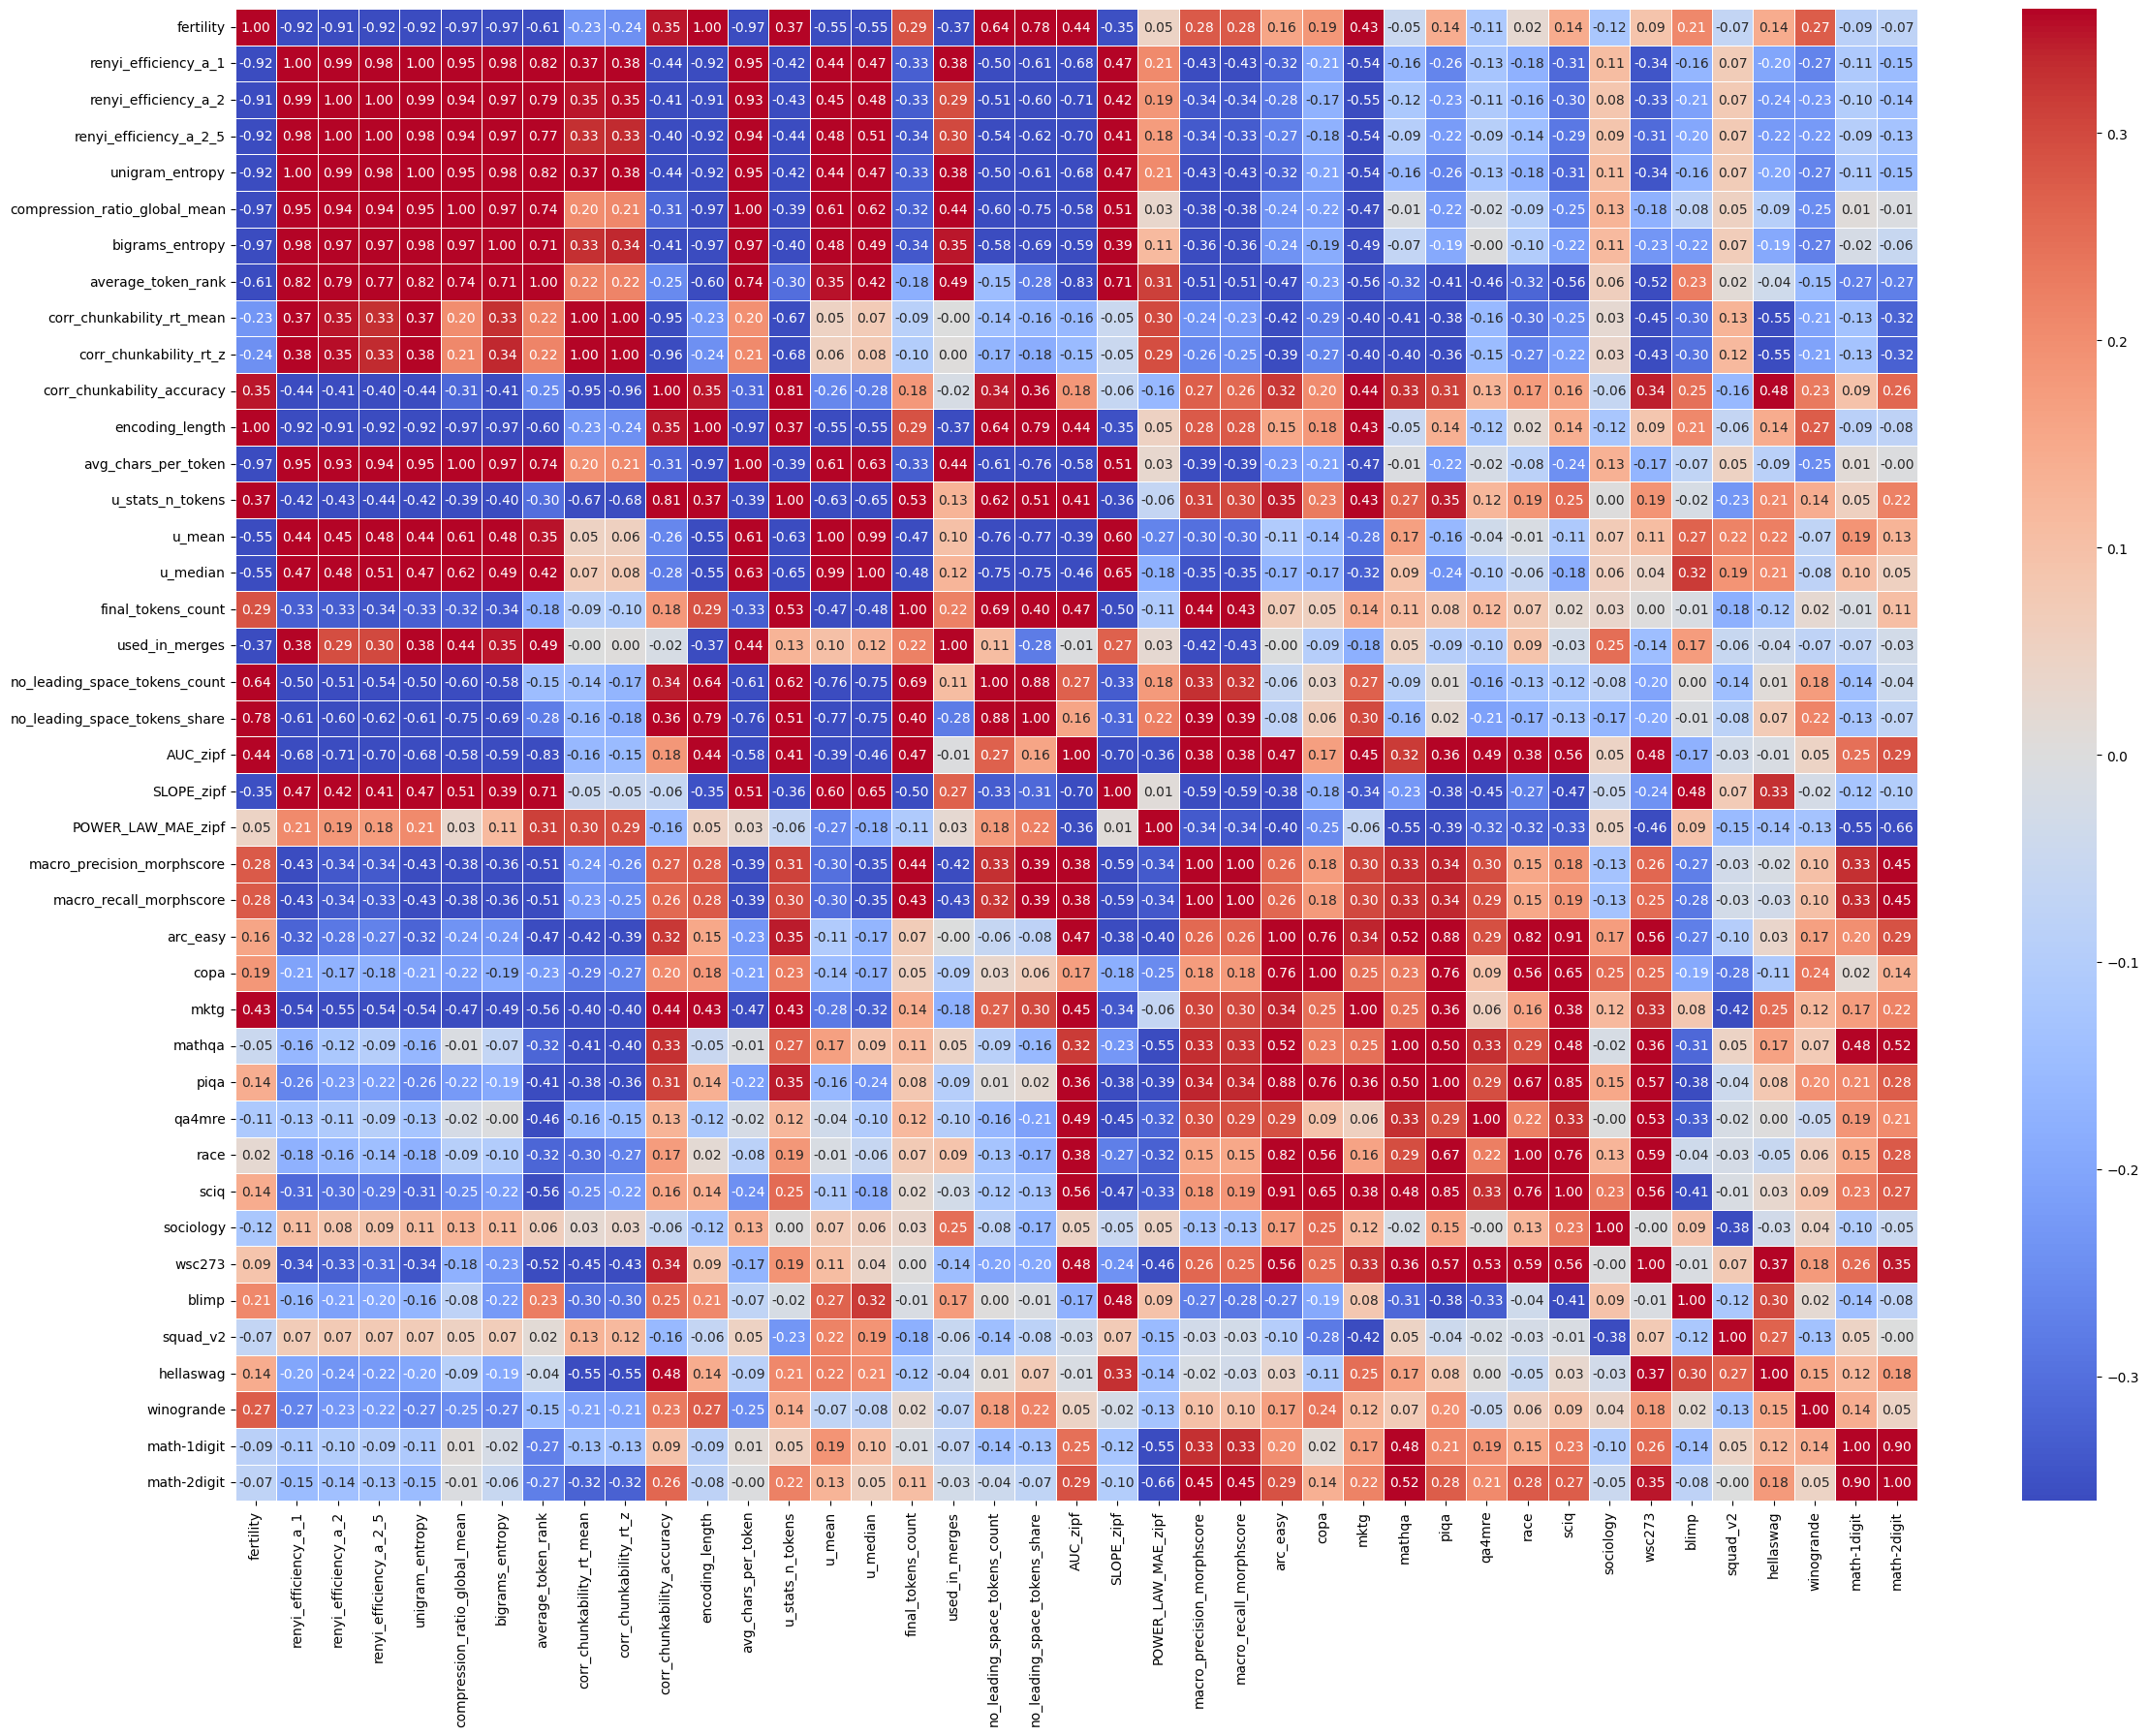

In [20]:
plt.figure(figsize=(28, 20))
hmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    vmin=-0.36,
    vmax=0.36,
)

In [32]:
ordered_mod_cols = [
    'arc_easy',
    'copa',
    'hellaswag',
    'mktg',
    'mathqa',
    'math-1digit',
    'math-2digit',
    'piqa',
    'qa4mre',
    'squad_v2',
    'race',
    'sciq',
    'sociology',
    'wsc273',
    'blimp',
    'winogrande',
]

In [33]:
assert set(ordered_mod_cols) == set(mod_cols + mod_ex_cols)

In [34]:
masked_corr = corr_matrix.loc[ordered_mod_cols, tok_cols]
masked_corr_sq = masked_corr * abs(masked_corr)

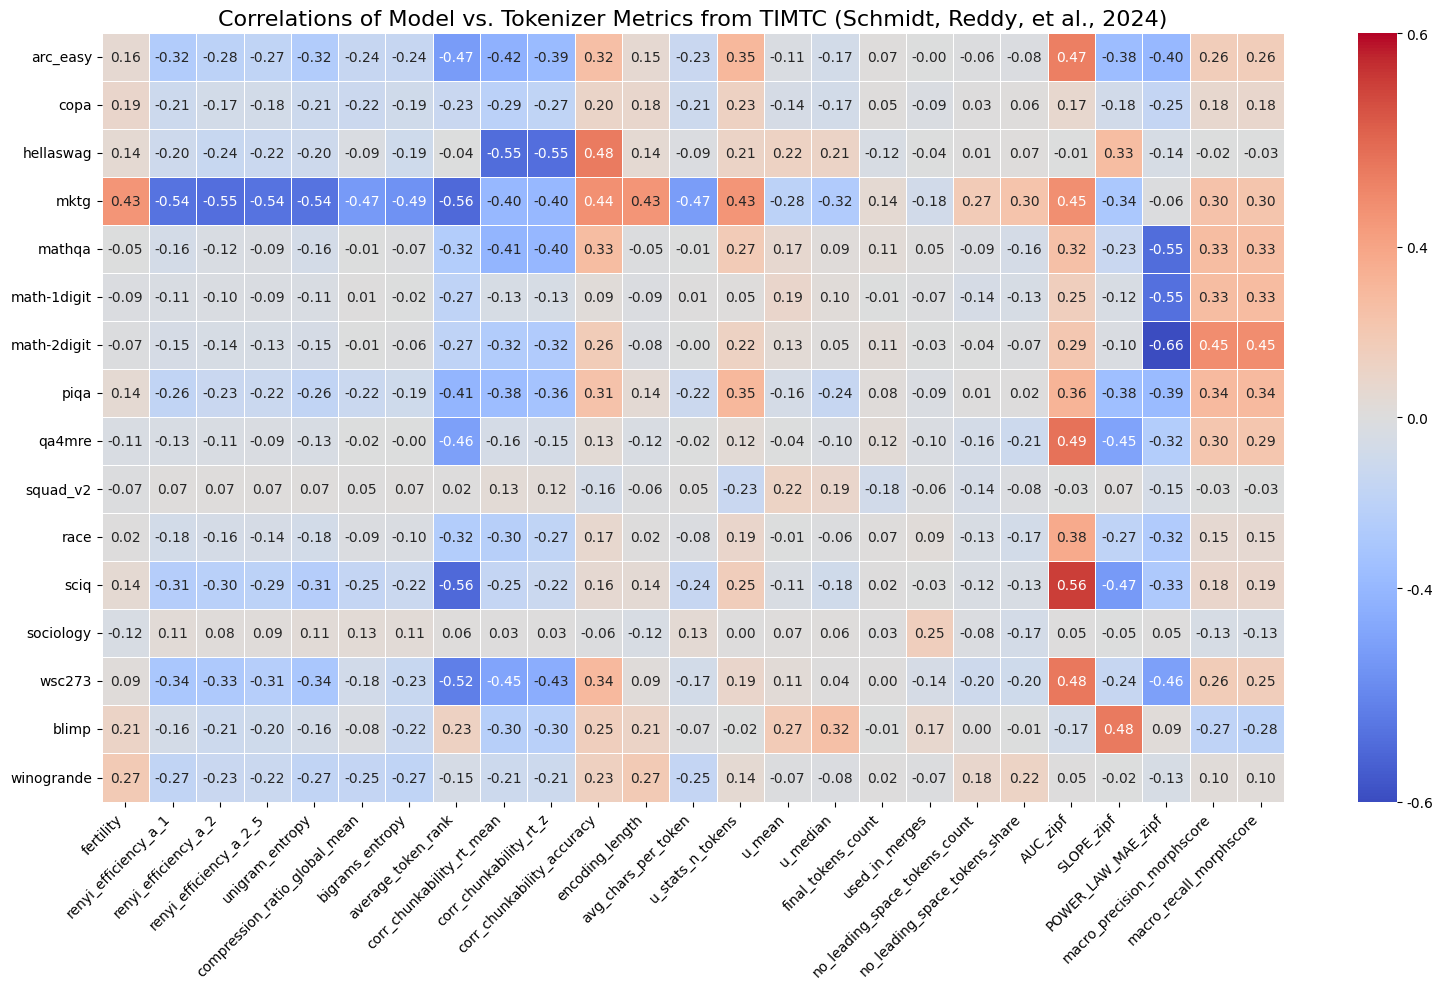

In [37]:
plt.figure(figsize=(16, 10))
hmap = sns.heatmap(
    masked_corr_sq,
    annot=masked_corr, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    vmin=-0.36,
    vmax=0.36,
)
plt.title('Correlations of Model vs. Tokenizer Metrics from TIMTC (Schmidt, Reddy, et al., 2024)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
cbar = hmap.collections[0].colorbar
cbar.set_ticks([-0.36, -0.16, 0.0, 0.16, 0.36])
cbar.set_ticklabels(['-0.6', '-0.4', '0.0', '0.4', '0.6'])
plt.show()

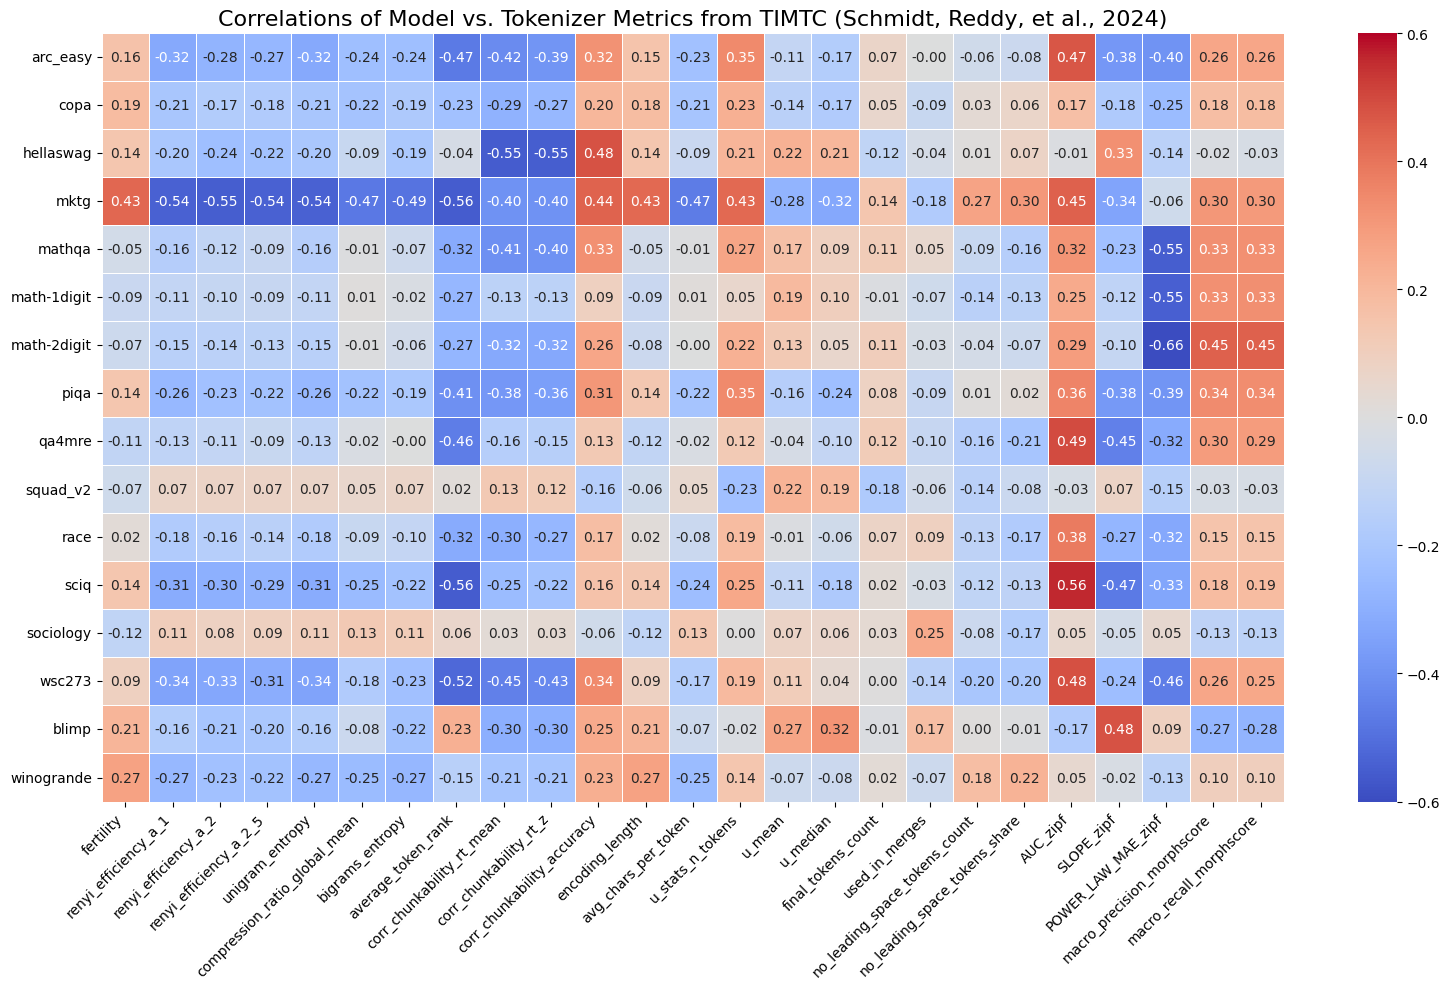

In [36]:
plt.figure(figsize=(16, 10))
hmap = sns.heatmap(
    masked_corr,
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    vmin=-0.6,
    vmax=0.6,
)
plt.title('Correlations of Model vs. Tokenizer Metrics from TIMTC (Schmidt, Reddy, et al., 2024)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()